In [2]:
import pandas as pd

ads = pd.read_csv("../Data/Social_Network_Ads.csv")

ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(ads[["Gender", "Age","EstimatedSalary"]], drop_first=True)
y = ads["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [4]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [6]:
from sklearn.metrics import accuracy_score

print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.925
Test Accuracy: 0.875


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")
print(f"Test Precision: {precision_score(y_test, knn.predict(X_test_std))}")
print(f"Test Recall: {recall_score(y_test, knn.predict(X_test_std))}")

Test Accuracy: 0.875
Test Precision: 0.8055555555555556
Test Recall: 0.90625


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, knn.predict(X_train_std))

array([[197,  12],
       [ 12,  99]], dtype=int64)

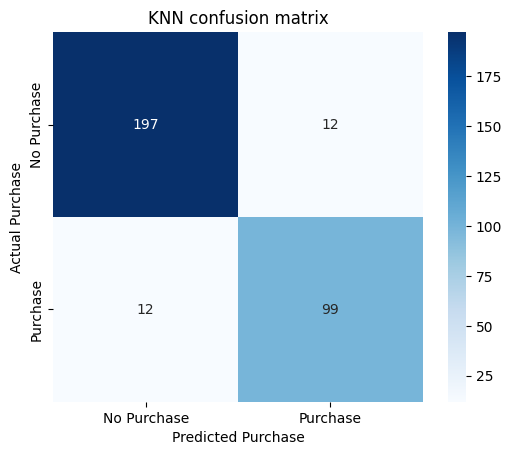

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Purchase", "Purchase"],        
    yticklabels=["No Purchase", "Purchase"]
).set(
    xlabel='Predicted Purchase',
    ylabel='Actual Purchase',
    title='KNN confusion matrix'
);

In [10]:
#y_pred = knn.predict(X_train_std)

In [11]:
#y_pred = knn.predict_proba(X_train_std)[:,1] > 0.32

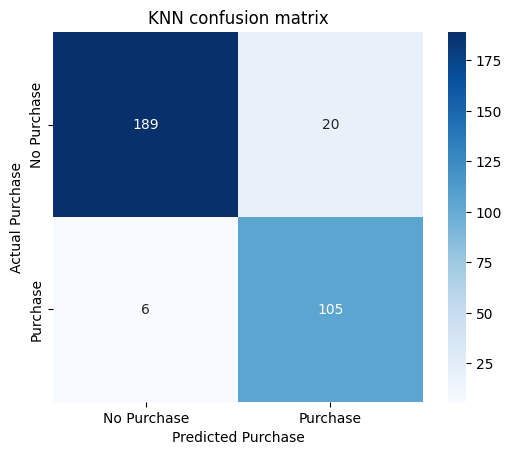

In [12]:
y_pred = knn.predict_proba(X_train_std)[:,1] > 0.32

import seaborn as sns
from sklearn.metrics import confusion_matrix

knn_confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Purchase", "Purchase"],        
    yticklabels=["No Purchase", "Purchase"]
).set(
    xlabel='Predicted Purchase',
    ylabel='Actual Purchase',
    title='KNN confusion matrix'
);

In [13]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred)

0.8898305084745762

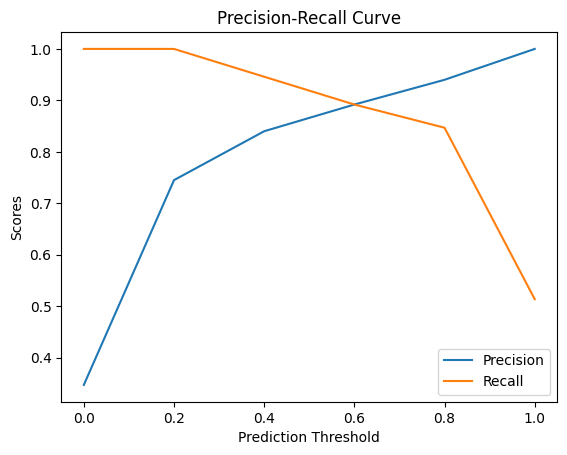

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, knn.predict_proba(X_train_std)[:,1])

# p_r_curve = pd.DataFrame({"precision": p_curve, "recall": r_curve, "threshold": t_curve})

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, solver="lbfgs", C=2)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.840625
Test Accuracy: 0.85


In [16]:
import seaborn as sns

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = iris.iloc[:, :4].sample(len(iris), random_state=2023)
y = iris["species"].sample(len(iris), random_state=2023)

lr = LogisticRegression(max_iter=1000)

lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = lr.predict(X)

y_pred

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'vir

In [19]:
precision_score(y, y_pred, average="weighted")

0.9738247863247864